# Churning Customer

Customer Churn adalah jumlah atau presentasi pelanggan yang berhenti menggunakan produk atau berhenti berlangganan selama dalam suatu periode tertentu, hal ini menandai ketidakpuasan customer, tawaran lebih murah dari pesaing, pemasaran yang lebih baik oleh pesaing, atau penyebab lain.

Dalam bisnis yang sedang bertumbuh, biaya untuk mendapatkan pelanggan baru jauh lebih besar dibanding dengan biaya mempertahankan pelanggan yang sudah ada. Selain berdampak pada menurunnya pendapatan, customer churn juga berdampak pada reputasi perusahaan, dalam posisi seperti itu tentu usaha untuk mendapatkan customer baru akan lebih susah lagi. 

Pada notebook ini, saya akan menggunakan dataset dari [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) untuk melakukan analisa data dan prediksi customer churning. Dataset merupakan data sample dari IBM. Dataset terdiri dari 7043 sample dan 21 kolom dengan deskripsi berikut:

- __CustomerID:__ Customer ID
- __Gender:__ Customer laki-laki atau perempuan(male,female)
- __SeniorCitizen:__ Merupakan customer berusia lanjut atau tidak (1, 0) 
- __Partner:__ Customer memiliki pasangan atau tidak, bisa berarti suami, istri, atau teman (Yes, No) 
- __Dependents:__ Customer mempunyai orang sebagai tanggungan atau tidak, tanggungan bisa berarti anak, orang tua, kakek/nenek(Yes,No)
- __Tenure:__ Jumlah bulan Customer sudah berlangganan 
- __PhoneService:__ Customer berlangganan telephone atau tidak (Yes, No) 
- __MultipleLines:__ Customer berlangganan MultipleLines telephone atau tidak (Yes, No, No phone service) 
- __InternetService:__  Mengindikasikan layanan internet yang dipilih pelanggan(DSL, Fiber optic, No) 
- __OnlineSecurity:__  Apakah customer berlangganan layanan tambahan Online Security yang disediakan oleh perusahaan (Yes, No, No internet service) 
- __OnlineBackup:__ Apakah customer berlangganan layanan tambahan Online Backup yang disediakan oleh perusahaan(Yes, No, No internet service) 
- __DeviceProtection:__ Apakah customer berlangganan layanan tambahan Device Protection yang disediakan oleh perusahaan (Yes, No, No internet service) 
- __TechSupport:__ Apakah customer berlangganan layanan tambahan TechSupport(Yes, No, No internet service) 
- __StreamingTV:__ Apakah customer berlangganan layanan tambahan Streaming TV (Yes, No, No internet service) 
- __StreamingMovies:__ Apakah customer berlangganan layanan tambahan Streaming Movies. (Yes, No, No internet service) 
- __Contract:__ Ketentuan kontrak yang dpilih pelanggan (Month-to-month, One year, Two year)
- __PaperlessBilling:__ Mengindikasikan customer memilih paperless billing(Yes, No) 
- __PaymentMethod:__ Metode pembayaran yang dipilih pelanggan (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- __MonthlyCharges:__ Total biaya yang dibayarkan pelanggan setiap bulan
- __TotalCharges:__ Total biaya yang sudah dibayarkan pelanggan selama berlangganan
- __Churn:__ Apakah pelanggan keluar dari bisnis (Churn) atau tidak (Yes or No)


## Load Library and Dataset

In [3]:
#Importing libraries
import numpy as np 
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [4]:
## Load Dataset
pd.set_option("display.max_columns", 22)
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Describe dataset
telco.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,0679-TDGAK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# Cleaning Data

### 1. Null Values

In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Dataset tidak memiliki null value, tapi kolom Total Charges memiliki type data yang tidak sesuai

In [7]:
## check data non numeric on TotalCharges column
# x = telco['TotalCharges']
# for i in x:
#     try:
#         a = float(i)
#     except:
#         print(f'-{i}-')

In [8]:
display(telco[telco['TotalCharges']==' '].head())
len(telco[telco['TotalCharges']==' '])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


11

In [9]:
telco[telco['tenure']==1].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No


- Total charges tidak mempunyai nilai kemungkinan disebabkan karena tenure = 0, namun nilai tenure = 0 bisa kita anggap sebagai null value

In [10]:
## Replacing spaces with null values in total charges column and drop them
telco['TotalCharges'] = telco["TotalCharges"].replace(" ",np.nan)
telco.dropna(inplace=True)
## Convert data type to numeric 
telco['TotalCharges'] = telco['TotalCharges'].astype('float64')
telco = telco.reset_index()[telco.columns]
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

### 2. Outliers

Terdapat 3 kolom numeric ( Tenure, Monthly Charges, and Total Charges), saya akan menggunakan plotly boxplot untuk melihat apakah terdapat outlier atau tidak

In [11]:
telco[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
# Checking for outlier using Box plot
trace1 = go.Box(y=telco["tenure"], name = "Tenure", marker=dict(color= '#71bebd')) 
trace2 = go.Box(y=telco["MonthlyCharges"], name = 'MonthlyCharges',marker=dict(color= '#71bebd'))
trace3 = go.Box(y=telco["TotalCharges"], name = 'TotalCharges',marker=dict(color= '#71bebd'))

data = [trace1,trace2,trace3]
layout = go.Layout(dict(title = "Outlier"),plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor = "rgba(0,0,0,0)")
fig = go.Figure(data = data, layout = layout)
fig.show()

Tidak terdapat outlier pada 3 feature di atas

# Exploratory Data Analysis

## 1. Churning Customer Based on Demography

In [13]:
# Label encoder for binary columns
pd.set_option("display.max_columns", 40)
bin_cols= ['Partner','Dependents','PhoneService','PaperlessBilling']

for i in bin_cols:
    telco[i] = telco[i].map({'Yes':1,'No':0})
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


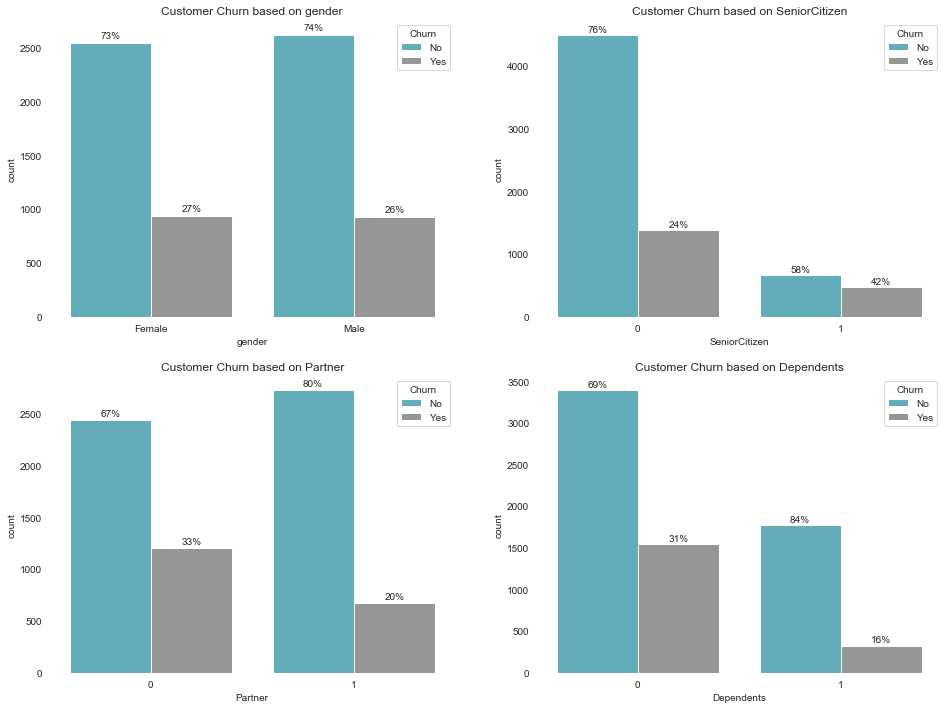

In [14]:
## Total Customer Churn
key = telco["Churn"].value_counts().keys().tolist()
val = telco["Churn"].value_counts().values.tolist()
trace = go.Pie(labels = key ,values = val ,
               marker = {'colors' :  [ '#54b6c8' ,'#969696']}, hole = .6)
layout = go.Layout(dict(title = "Customer Churn in data"),
                        plot_bgcolor  = "rgba(0,0,0,0)",
                        paper_bgcolor = "rgba(0,0,0,0)",
                        annotations = [{'text' : f"Churning Customer",'font' : {'size' : 18},
                                                'showarrow' : False}])
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## Customer Churn based on Demography
bin_cols= ['gender','SeniorCitizen','Partner','Dependents']
plt.figure(figsize=(16,12))
sns.set_style("white")
for i in range(1,5):
    plt.subplot(2,2,i)
    ax = sns.countplot(telco[bin_cols[i-1]], hue=telco['Churn'], palette=[ '#54b6c8' ,'#969696'])
    ## text percent
    bars = ax.patches #4 bars
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height() # value non churn
        height_r = right.get_height() # get value churn
        total = height_l + height_r #total 2 bars
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center") #without decimal
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
        plt.title(f'Customer Churn based on {bin_cols[i-1]}')
        sns.despine(left=True, bottom=True) #white background
#         fig = ax.get_figure()
#     fig.savefig(f"{i}.png")

- Terdapat 26.6% customer berhenti berlangganan
- Perbedaan Gender hanya sedikit mempengaruhi Customer Churn
- Customer Senior Citizen, tidak mempunyai Partner, dan tidak mempunyai Dependent mempunyai kecenderungan lebih tinggi untuk berhenti langganan.

## 2. Churning Customer berdasarkan Services dan Subscription

__Multiple Lines__

In [70]:
# Multiple Lines
ch = telco[telco["Churn"] == "Yes"]['MultipleLines'].value_counts()
nch = telco[telco["Churn"] == "No"]['MultipleLines'].value_counts()

df1 = pd.DataFrame(ch).rename(columns={'MultipleLines':'ch'})  
df2 = pd.DataFrame(nch).rename(columns={'MultipleLines':'no_ch'})
df = pd.concat([df1,df2],axis=1)
df['ch%']  = df.apply(lambda x:f"{round((x['ch']/(x['ch']+x['no_ch']))*100,2)}%",axis=1)
df['no_ch%'] = df.apply(lambda x:f"{round((x['no_ch']/(x['ch']+x['no_ch']))*100,2)}%",axis=1)

trace1 = go.Bar(y = df.index  , x = df['ch'],
                name = "Churn", marker = {'color':  '#969696'},
                text = df['ch%'], textposition = 'auto', orientation = 'h')

trace2 = go.Bar(y = df.index , x = df['no_ch'],
                name = "Non Churn", marker = {'color' : '#54b6c8'},
                text = df['no_ch%'],textposition = 'auto', orientation = 'h')

layout = go.Layout(dict(title = "Customer Churn Based on MultipleLines",
                        paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                        xaxis = {'title' : 'Count'}, yaxis = {'title' : 'Multiple Lines'}))
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

Kecenderungan berhenti langganan bagi customer yang menambahkan multiple lines pada layanan telephone mereka sedikit lebih tinggi dibanding yang tidak menggunakan telephone multiple lines.

__Telephone dan Internet__

Sebelumnya saya akan membagi pelanggan telephone dan internet sebagai berikut:

1. Subcribe Phone Only
2. Subcribe Internet DSL Only
3. Subcribe Internet Fiber Optic Only
4. Subcribe Phone and Internet DSL
5. Subcribe Phone and Internet Fiber optic

In [71]:
telco['PhoneOnly'] = telco.apply(lambda i: 1 if (i['PhoneService'] == 1) and (i['InternetService'] == 'No') else 0,axis=1)
telco['DSLOnly'] = telco.apply(lambda i: 1 if (i['PhoneService'] == 0) and (i['InternetService'] == 'DSL') else 0,axis=1)
telco['FiberOpticOnly'] = telco.apply(lambda i: 1 if (i['PhoneService'] == 0) and (i['InternetService'] == 'Fiber optic') else 0,axis=1)
telco['Phone&DSL'] = telco.apply(lambda i: 1 if (i['PhoneService'] == 1) and (i['InternetService'] == 'DSL') else 0,axis=1)
telco['Phone&FiberOptic'] = telco.apply(lambda i: 1 if (i['PhoneService'] == 1) and (i['InternetService'] == 'Fiber optic') else 0,axis=1)
# telco.head()

In [72]:
## tidak ada pelanggan yang hanya berlangganan Internet Fiber Optic saja
telco[telco['FiberOpticOnly'] == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneOnly,DSLOnly,FiberOpticOnly,Phone&DSL,Phone&FiberOptic


In [73]:
## Phone and Internet Service                        
phone = telco[telco['PhoneOnly']==1].pivot_table(index='Churn',aggfunc='count')[['PhoneOnly']]
dsl = telco[telco['DSLOnly']==1].pivot_table(index='Churn',aggfunc='count')[['DSLOnly']]
phoneDSL = telco[telco['Phone&DSL']==1].pivot_table(index='Churn',aggfunc='count')[['Phone&DSL']]
phoneFiber = telco[telco['Phone&FiberOptic']==1].pivot_table(index='Churn',aggfunc='count')[['Phone&FiberOptic']]
df = pd.concat([phone,dsl,phoneDSL,phoneFiber],axis=1).T
df['%ch'] = df.apply(lambda i: f"{round((i['Yes']/(i['Yes']+i['No']))*100,2)}%",axis=1)
df['%no_ch'] = df.apply(lambda i: f"{round((i['No']/(i['Yes']+i['No']))*100,2)}%",axis=1)
                        
trace1 = go.Bar(y = df.index  , x = df['Yes'],
                name = "Churn", marker = {'color':  '#969696'},
                text = df['%ch'], textposition = 'auto', orientation = 'h')

trace2 = go.Bar(y = df.index , x = df['No'],
                name = "Non Churn", marker = {'color' :  '#54b6c8'},
                text = df['%no_ch'], textposition = 'auto',orientation = 'h')

layout = go.Layout(dict(title = "Customer Based on Subcription",
                        paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                        xaxis = {'title' : 'Count'}, yaxis = {'title' : 'Subcription'}))
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

- Customer yang hanya berlangganan telephone saja, memiliki kecenderungan yang rendah untuk berhenti langganan
- Customer yang berlangganan telephone dan internet fiber optic justru memiliki kecenderungan yang tinggi untuk berhenti berlangganan, berdasar grafik di atas, faktor terbesar customer berhenti berlangganan adalah layanan internet fiber optic.

__Additional Subcription__

In [74]:
## Layanan tambahan bagi pengguna layanan internet
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
ch = []
no_ch = []
for i in cols:
    ch.append(telco[telco[i] == 'Yes'][i][telco['Churn'] == 'Yes'].value_counts().values[0])
    no_ch.append(telco[telco[i] == 'Yes'][i][telco['Churn'] == 'No'].value_counts().values[0])

df = pd.DataFrame({'ch': ch, 'no_ch': no_ch},index= cols)      
df['ch%']  = df.apply(lambda x:f"{round((x['ch']/(x['ch']+x['no_ch']))*100,2)}%",axis=1)
df['no_ch%'] = df.apply(lambda x:f"{round((x['no_ch']/(x['ch']+x['no_ch']))*100,2)}%",axis=1)

trace1 = go.Bar(y = cols  , x = ch,
                name = "Churn", marker = {'color':  '#969696'},
                text = df['ch%'],textposition = 'auto', orientation = 'h')
trace2 = go.Bar(y = cols , x = no_ch,
                name = "Non Churn",marker = {'color' :  '#54b6c8'},
                text = df['no_ch%'], textposition = 'auto',orientation = 'h')
layout = go.Layout(dict(title = "Customer Based on Additional Subcription",
                       paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                        xaxis = {'title' : 'Count'}, yaxis = {'title' : 'Subcription'}))
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

- Bagi pengguna layanan internet, grafik di atas menunjukan layanan tambahan yang bisa dinikmati pelanggan, pelanggan yang memilih tambahan layanan Streaming Movie dan Streaming TV memiliki kecenderengan berhenti langganan lebih besar dibanding yang lain.

## 3. Customer Churn Based on Contract and Payment Method

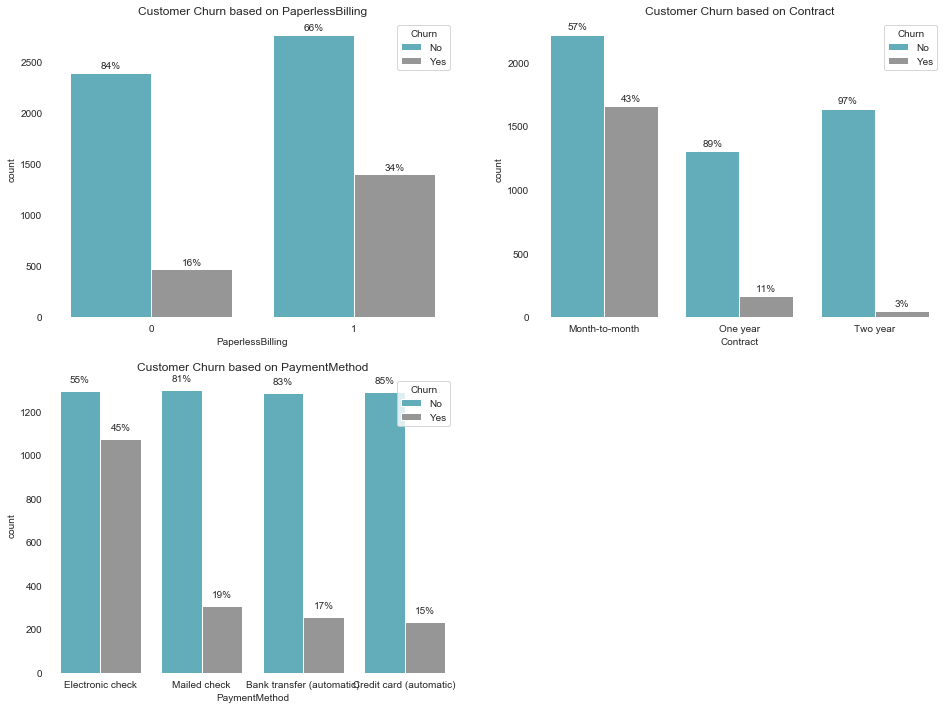

In [75]:
cols= ['PaperlessBilling','Contract','PaymentMethod']
plt.figure(figsize=(16,12))
sns.set_style("white")
for i in range(1,4):
    plt.subplot(2,2,i)
    ax = sns.countplot(telco[cols[i-1]], hue=telco['Churn'], palette=[ '#54b6c8' ,'#969696'])
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
        plt.title(f'Customer Churn based on {cols[i-1]}')
        sns.despine(left=True, bottom=True)
#         fig = ax.get_figure()
#     fig.savefig("payment_method.png")

- Pelanggan yang menggunakan paperless billing memiliki _churning rate_ lebih besar dibanding yang tidak menggunakan paperless billing
- Pelanggan dengan kontrak perbulan memiliki kecenderungan yang lebih besar untuk berhenti langganan dibanding pelanggan yang mempunyai kontrak per tahun ataupun per dua tahun. 
- Berdasarkan metode pembayaran, pelanggan dengan metode pembayaran Electronic Chek memiliki prosentase untuk berhenti berlangganan jauh lebih besar dibanding dengan pelanggan yang menggunakan metode pembayaran lain.

## 4. Customer Churn berdasarkan Tenure

Saya akan melihat sebaran data pada tenure mengunakan histogram dan boxplot, selain itu saya juga ingin melihat sebaran data tenure dengan mengelompokannya untuk tiap tahun

In [76]:
# Make new categorical column based on Tenure 
def tenure_col(telco) :
    
    if telco["tenure"] <= 12 :
        return "1-12"
    elif (telco["tenure"] > 12) & (telco["tenure"] <= 24 ):
        return "13-24"
    elif (telco["tenure"] > 24) & (telco["tenure"] <= 36) :
        return "25-36"
    elif (telco["tenure"] > 36) & (telco["tenure"] <= 48) :
        return "37-48"
    elif (telco["tenure"] > 48) & (telco["tenure"] <= 60) :
        return "49-60"
    elif telco["tenure"] > 60 :
        return "61-72"
telco["tenure_col"] = telco.apply(lambda i:tenure_col(i),axis = 1)
# telco.to_csv('telcom_vis.csv',index=False)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneOnly,DSLOnly,FiberOpticOnly,Phone&DSL,Phone&FiberOptic,tenure_col
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,0,1,0,0,0,1-12
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No,0,0,0,1,0,25-36
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,0,0,0,1,0,1-12
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,0,1,0,0,0,37-48
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,0,0,0,0,1,1-12


In [77]:
## distribution using histogram
def histogram(column) :
    churn     = telco[telco["Churn"] == "Yes"]
    not_churn = telco[telco["Churn"] == "No"]
    trace1 = go.Histogram(x  = churn[column],name = "Churn",
                          marker = {'color' :  '#969696'}, opacity = .9)   
    trace2 = go.Histogram(x  = not_churn[column], name = "Not churn",
                          marker = {'color':  '#54b6c8'},opacity = .9)
    trace3 = go.Histogram(x  = telco[column],name = "All Customers",opacity = .9)
    
    data = [trace1,trace2,trace3]
    layout = go.Layout(dict(title =column + " distribution",
                            paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                            xaxis = dict(title = column),
                            yaxis = dict(title = "count")))
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)

histogram('tenure')

# Tenure distribution using Box plot
def boxplot(column):
    trace1 = go.Box(x=telco[column][telco['Churn']=='Yes'], name = 'Churn',marker=dict(color= '#969696'),orientation='h')
    trace2 = go.Box(x=telco[column][telco['Churn']=='No'], name = "Not Churn", marker=dict(color= '#54b6c8'),orientation='h') 
    trace3 = go.Box(x=telco[column], name = 'All Customers',orientation='h')
    data = [trace1,trace2,trace3]
    layout = go.Layout(dict(title = f"Customer Churn Based on {column}"),xaxis = dict(title = column),
                       plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor = "rgba(0,0,0,0)")
    fig = go.Figure(data = data, layout = layout)
    fig.show()
boxplot('tenure')

## tenure by year
piv = telco.pivot_table(index='tenure_col',columns='Churn',aggfunc='count')[['customerID']]
piv = piv['customerID']
piv['ch%'] = piv.apply(lambda i: f"{round((i['Yes']/(i['No']+i['Yes']))*100,2)}%",axis=1)
piv['no_ch%'] = piv.apply(lambda i: f"{round((i['No']/(i['No']+i['Yes']))*100,2)}%",axis=1)

trace1 = go.Bar(y = piv.index  , x = piv['Yes'],
                name = "Churn",marker = {'color' :  '#969696'},
                text = piv['ch%'], textposition = 'auto', orientation = 'h')

trace2 = go.Bar(y = piv.index, x = piv['No'],
                name = "Non Churn", marker = {'color':  '#54b6c8'},
                text = piv['no_ch%'], textposition = 'auto', orientation = 'h')

layout = go.Layout(dict(title = "Customer Churn in tenure groups",
                       paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
                        xaxis = dict(title = "Count"),
                        yaxis = dict(title = "Tenure (month)")))
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

print(f"The median value Customer Churn Based on Tenure is : {telco['tenure'][telco['Churn']=='Yes'].median()}")
print(f"The mode value Customer Churn Based on Tenure is : {telco['tenure'][telco['Churn']=='Yes'].mode()[0]}")

The median value Customer Churn Based on Tenure is : 10.0
The mode value Customer Churn Based on Tenure is : 1


- Grafik pertama dan kedua merupakan distrbusi data customer churn berdasar tenure, berdasarkan 'churn customer' grafik menunjukan _right skew_ / _positive skew_ yang artinya mayoritas data terdistribusi di nilai yang rendah. Dari grafik tersebut bisa dikatakan bahwa di bulan bulan awal berlangganan, _churning rate_ sangatlah tinggi, bahkan di bulan pertama _churning rate_ lebih tinggi dari non churning. 
- Grafik ketiga menunjukan perbandingan customer churn berdasarkan tenure group. Customer churn untuk tenure dibawah 1 tahun (0-12) sangat besar, bahkan hampir memiliki proporsi sama dengan non churn customer, namun bagi pelanggan yang sudah berlangganan lebih dari 1 tahun, kecenderungan untuk berhenti berlangganan mengalami penurunan tajam.
- Median tenure Customer Churn adalah 10, dan nilai mode adalah 1, ini berarti paling banyak Customer berhenti langganan pada bulan pertama dan sebagian besar berhenti langganan sebelum bulan ke 10.
- Berdasar 3 grafik di atas, tenure sangat mempengaruhi _churning rate_ , semakin lama berlangganan semakin rendah  _churning rate_

## 5. Customer Churn Berdasarkan Monthly Charges dan Total Charges

Dalam dataset tidak disebutkan satuan dari Monthly Charges dan Total Charges, untuk itu saya asumsikan menggunakan mata uang US dolar sebagai nilai umum

__Monthly Charges__

In [78]:
# Histogram for Monthly Charges
histogram('MonthlyCharges')
# Monthly Charges distribution using Box plot
boxplot('MonthlyCharges')    

- Dari grafik, Churn Customer terdistribusi pada nilai yang lebih tinggi daripada Customer Not Churn, hal ini menandakan pelanggan dengan Monthly Charges yang lebih tinggi mempunyai kecenderungan untuk berhenti langganan lebih tinggi

__Total Charges__

In [79]:
# Histogram for Monthly Charges
histogram('TotalCharges')
# Monthly Charges distribution using Box plot
boxplot('TotalCharges')

Pada feature Total Charges, distribusi Customer Churn berada pada nilai yang lebih rendah dari Customer Not Churn, apakah ini berarti nilai total charges rendah mempunyai kecenderungan churning yang lebih tinggi?, TotalCharges kemungkinan besar dipengaruhi oleh tenure dan monthly charges, untuk itu kita perlu tahu korelasi antara nilai tersebut. Saya menggunakan scatter plot untuk menggambarkan korelasi antar fitur dan fungsi ```corr()``` dari pandas untuk menghitung nilai korelasinya berdasarkan metode Pearson.

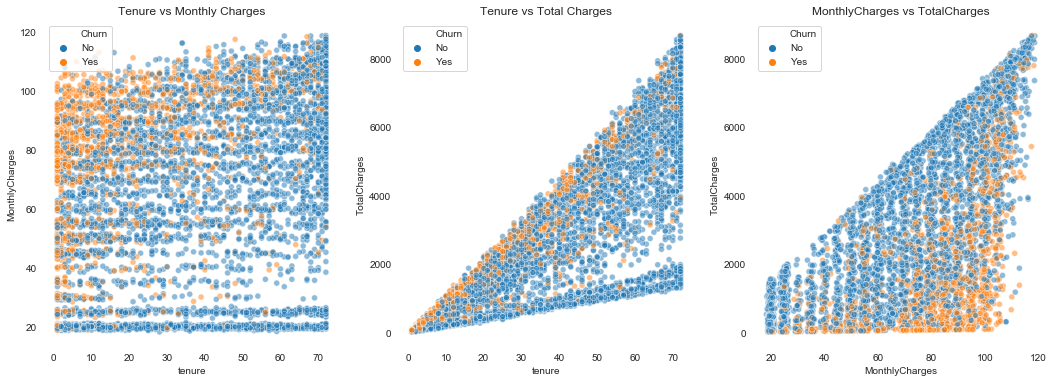

In [80]:
fig = plt.figure(figsize=(18,6))
sns.set_style('white')
plt.subplot(131)
ax1 = sns.scatterplot(x = telco['tenure'], y = telco['MonthlyCharges'], hue = "Churn",
                    data = telco, alpha = .5)
sns.despine(left=True, bottom=True)
plt.title('Tenure vs Monthly Charges')

plt.subplot(132)
ax2 = sns.scatterplot(x = telco['tenure'], y = telco['TotalCharges'], hue = "Churn",
                    data = telco, alpha = .5)
sns.despine(left=True, bottom=True)
plt.title('Tenure vs Total Charges')

plt.subplot(133)
ax2 = sns.scatterplot(x = telco['MonthlyCharges'], y = telco['TotalCharges'], hue = "Churn",
                    data = telco, alpha = .5)
sns.despine(left=True, bottom=True)
plt.title('MonthlyCharges vs TotalCharges')

# plt.savefig('1')
plt.show()

- Grafik pertama menunjukan bahwa mayoritas Customer Churn terdistribusi pada tenure rendah dengan biaya perbulan yang tinggi
- Grafik kedua menunjukan adanya korelasi positif yang kuat antara tenure dengan Total Charges, mayoritas customer churn terdistribusi pada tenure rendah tetapi dengan nilai total charges yang tinggi
- Pada grafik ketiga, mayoritas customer churn berada pada Monthly Charges yang lebih tinggi dan Total charges yang rendah, hal ini kare Total charge dipengaruhi oleh tenure seperti terlihat pada grafik 2

(0, 3)

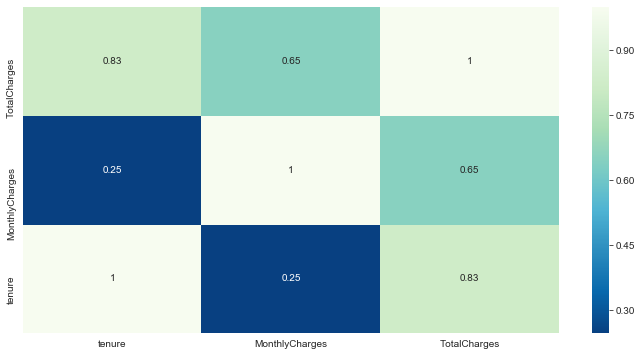

In [81]:
plt.figure(figsize=(12, 6))
corr = telco[['tenure','MonthlyCharges','TotalCharges']].corr()
sns.heatmap(corr,annot=True, cmap="GnBu_r")
plt.ylim(0,3)

Fitur Total Charges memiliki nilai korelasi 0.65 terhadap Monthly Charges dan 0.83 terhadap Tenure, berdasarkan tabel korelasi di atas ini merupakan nilai korelasi yang tinggi dengan arah positif. Jadi distribusi data pada feature TotalCharges sangat dipengaruhi oleh tenure.

### Monthly Charges and Total Charges vs Other Features

Pada tahap ini saya ingin mengetahui apakah MonthlyCharges dan TotalCharges dependent terhadap feature lain di dalam dataset ini atau tidak, saya menggunakan Ordinary Least Square untuk membuat model linear dan menghitung $R^2$. $R^2$  merupakan nilai persentase jumlah data dari variabel independen yang secara bersama-sama mempengaruhi varaiabel dependen, hasil ini akan jadi pertimbangan untuk menggunakan 2 feature tersebut sebagai variable prediktor dalam membangun model Machine Learning atau tidak,  selain itu saya akan melihat nilai coeficient tiap variable untuk mengetahui variable apa saja yang mempengaruhi MonthlyCharges.

### Handling Text and Scaling Data

Sebelum menghitung OLS, saya akan mengubah data text menjadi numeric,untuk melakukan handling text, saya akan menggunakan ```LabelEncoder``` untuk binary feature, kemudian menggunakan pandas dummy variable untuk feature nominal category, dan scaling data menggunakan ```StandardScaler``` untuk feature numeric 

In [82]:
pd.set_option("display.max_columns", 43)
bin_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
var_dummy = ['gender','MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
std_cols = ['tenure','MonthlyCharges','TotalCharges']

## Label Encoder for binary columns
label = LabelEncoder()
for i in bin_cols:
    telco[i] = label.fit_transform(telco[i])

## Label encoder for nominal category
telco = pd.get_dummies(data=telco, columns = var_dummy)
telco = telco.drop(['PhoneOnly','DSLOnly','FiberOpticOnly','Phone&DSL','Phone&FiberOptic','tenure_col'],axis=1)

## Standard Scaler
scaler = StandardScaler()
scaled = scaler.fit_transform(telco[['tenure','MonthlyCharges','TotalCharges']])
scaled = pd.DataFrame(scaled,columns=['tenure','MonthlyCharges','TotalCharges'])

telco = telco.drop(columns=['tenure','MonthlyCharges','TotalCharges'],axis=1)
telco = pd.concat([telco,scaled],axis=1)

telco.to_csv('telcom_clean1.csv',index=False)
telco.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,-1.239504,0.196178,-0.940457


### OLS pada Monthly Charges

In [83]:
feature1 = telco.drop(columns=['customerID','Churn','MonthlyCharges','TotalCharges'])
target1 = telco['MonthlyCharges']

ols = sm.OLS(target1, sm.add_constant(feature1))
ols_result = ols.fit()
print(f'R2 Score = {ols_result.rsquared}')
ols_result.params.sort_values(ascending=False)

R2 Score = 0.9988422226446931


InternetService_Fiber optic                0.467205
PhoneService                               0.253667
StreamingTV_Yes                            0.218109
StreamingMovies_Yes                        0.218037
MultipleLines_Yes                          0.210247
TechSupport_Yes                            0.136048
DeviceProtection_Yes                       0.135830
OnlineSecurity_Yes                         0.135721
OnlineBackup_Yes                           0.135426
MultipleLines_No                           0.043421
SeniorCitizen                              0.000477
Dependents                                 0.000471
tenure                                     0.000119
PaperlessBilling                          -0.000688
Partner                                   -0.001401
PaymentMethod_Credit card (automatic)     -0.028714
PaymentMethod_Bank transfer (automatic)   -0.028715
PaymentMethod_Mailed check                -0.029181
PaymentMethod_Electronic check            -0.029360
OnlineBackup

- Dilihat dari nilai Coeficientnya, Internet Service Fiber Optic paling mempengaruhi Monthly Charges, kemudian diikuti oleh Phone Service, Streaming TV, Streaming Movies dan Multiple Lines
- $R^2$ Monthly Charges adalah 99.9%, ini berarti 99.9% nilai Monthly Charges dipengaruhi oleh variable independen dalam dataset ini secara bersama sama

In [84]:
feature1 = telco.drop(columns=['customerID','Churn','TotalCharges'])
target1 = telco['TotalCharges']

ols = sm.OLS(target1, sm.add_constant(feature1))
ols_result = ols.fit()
print(f'R2 Score = {ols_result.rsquared}')
ols_result.params.sort_values(ascending=False)

R2 Score = 0.9075058087539439


tenure                                     0.663309
MonthlyCharges                             0.467777
PaymentMethod_Mailed check                 0.081258
OnlineBackup_Yes                           0.063650
OnlineSecurity_Yes                         0.050654
DeviceProtection_Yes                       0.047564
TechSupport_Yes                            0.046886
Contract_Month-to-month                    0.037855
Contract_One year                          0.030113
StreamingMovies_Yes                        0.026904
StreamingTV_Yes                            0.024186
MultipleLines_No phone service             0.014226
MultipleLines_Yes                          0.013664
Partner                                    0.008514
gender_Male                                0.007996
const                                      0.007629
InternetService_DSL                        0.005508
InternetService_Fiber optic                0.002053
StreamingMovies_No internet service        0.000068
StreamingTV_

- Berdasar nilai coeficient, tenure dan MonthlyCharges paling berpengaruh pada TotalCharges
- Sama halnya dengan Monthly Charges, Total Charges juga memiliki nilai $R^2$ yang tinggi, 2 feature ini kemungkinan besar tidak akan saya gunakan dalam membuat model Machine Learning

## 6. Summary

1. Berdasarkan Demography, Customer Senior Citizen, tidak mempunyai Partner, dan tidak mempunyai Dependent mempunyai kecenderungan lebih tinggi untuk berhenti langganan. Perbedaan Gender hanya sedikit mempengaruhi Customer Churn.


2. Berdasarkan Subcription, Pelanggan yang menggunakan Multiple Lines telephone, berlangganan Internet Fiber Optic, dan menambahkan layanan Streaming Movies dan Streaming TV mempunyai kecenderungan berhenti langganan lebih tinggi. Layanan internet Fiber Optic merupakan faktor terbesar Customer Churn berdasarkan subcription. 


3. Berdasarkan Kontrak dan Payment Method, pelanggan yang memilih kontrak Month to Month, mengunakan Paperless Billing dan memilih Electronic Check sebagai metode pembayaran, mempunyai kecenderungan berhenti langganan lebih tinggi. Mengikat pelanggan dengan kontrak One Year atau Two Year adalah langkah penting untuk menurunkan Customer Churn.


4. Berdasarkan Tenure:
    - Kecenderengungan berhenti langganan untuk pelanggan di bawah 1 tahun sangat besar, bahkan paling banyak pelanggan berhenti berlangganan pada bulan pertama.
    - Semakin lama berlangganan, kecenderungan berhenti langganan semakin menurun.


5. Berdasarkan Monthly Charges dan Total Charges :
    - Pada Monthly Charges, distribusi data Customer Churn berada pada angka yang lebih tinggi dibanding distribusi data Customer Not Churn, hal ini menandakan Customer dengan Monthly Charges yang lebih tinggi mempunyai kecenderungan berhenti langganan lebih tinggi juga.
        
    
6. Mendapatkan feedback dari pelanggan adalah hal yang sangat berharga bagi perusahaan untuk memastikan faktor faktor apa saja yang menyebabkan Customer Churn, dengan begitu langkah untuk memperbaiki kekurangan tersebut akan lebih efektif.